### Now here we have to solve a Classification Problem using proper implementation with Mlflow

In [2]:
#importing all required packages
import mlflow
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
import joblib
import warnings
warnings.filterwarnings('ignore')

In [3]:
data_path = './dataset/Cancer_data.csv'

In [4]:
#importing the Data - Cancer.csv
with open(data_path,'r',encoding="utf-8") as f:
    try:
        df = pd.read_csv(f)
    except:
        print("File not found")

In [5]:
df.sample(5)

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
728,37,0,33.589848,1,0,7.367946,2.548678,0,0
31,31,0,28.667435,1,1,3.565589,3.527483,0,0
275,56,0,34.365845,0,0,3.594238,3.637897,0,0
1290,45,1,34.025198,0,1,6.542358,4.600985,0,0
1191,64,0,16.890126,0,0,4.340489,2.953769,0,0


In [6]:
#creating a backup data while experimenting with the orginal data
b_df = df.copy()

In [7]:
#basic information of Provided data
def gather_basic_information(df):
    null_values = df.isnull().sum()
    duplicated_values = df.duplicated().sum()
    print("="*50)
    print(null_values[null_values > 0] if null_values.sum() > 0 else "No Missing Values")
    print(f"size of the data : {df.shape}")
    print(f"duplicated values : {duplicated_values}")
    print("="*50)
    print(f"description of data {df.describe().T}")
    print("="*50)
    print(df.info())
    print("="*50)

#First We have to mention EDA functions
def plot_distribution(target_future, df):
    plt.figure(figsize=(6,5))
    sns.countplot(x=target_future,data=df)
    plt.title("Target Future Distribution")
    plt.show()

def plot_histograms(cols,df):
    df[cols].hist(figsize=(8,7),bins=20,color='skyblue')
    plt.title("Histogram-overall distribution of data")
    plt.show()

def plot_correlation(df,num_features,target_feature):
    plt.figure(figsize=(7,6))
    corr = df[num_features + [target_feature]].corr()
    sns.heatmap(corr,annot=True,cmap="Greens")
    plt.title("correlation Heatmap")
    plt.show()

def plot_confusion_matrix(confusion_obj):
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_obj, annot=True, fmt='d', cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
    plt.title("Confusion Matrix - Classifier 1")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    

In [8]:
#gathering the basic Information
gather_basic_information(df)

No Missing Values
size of the data : (1500, 9)
duplicated values : 0
description of data                    count       mean        std        min        25%  \
Age               1500.0  50.320000  17.640968  20.000000  35.000000   
Gender            1500.0   0.490667   0.500080   0.000000   0.000000   
BMI               1500.0  27.513321   7.230012  15.000291  21.483134   
Smoking           1500.0   0.269333   0.443761   0.000000   0.000000   
GeneticRisk       1500.0   0.508667   0.678895   0.000000   0.000000   
PhysicalActivity  1500.0   4.897929   2.866162   0.002410   2.434609   
AlcoholIntake     1500.0   2.417987   1.419318   0.001215   1.210598   
CancerHistory     1500.0   0.144000   0.351207   0.000000   0.000000   
Diagnosis         1500.0   0.371333   0.483322   0.000000   0.000000   

                        50%        75%        max  
Age               51.000000  66.000000  80.000000  
Gender             0.000000   1.000000   1.000000  
BMI               27.598494  33.85

### Now we have to perform the EDA

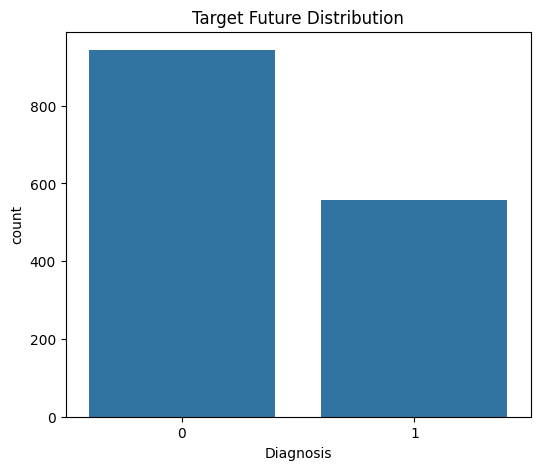

In [9]:
plot_distribution(df['Diagnosis'],df)

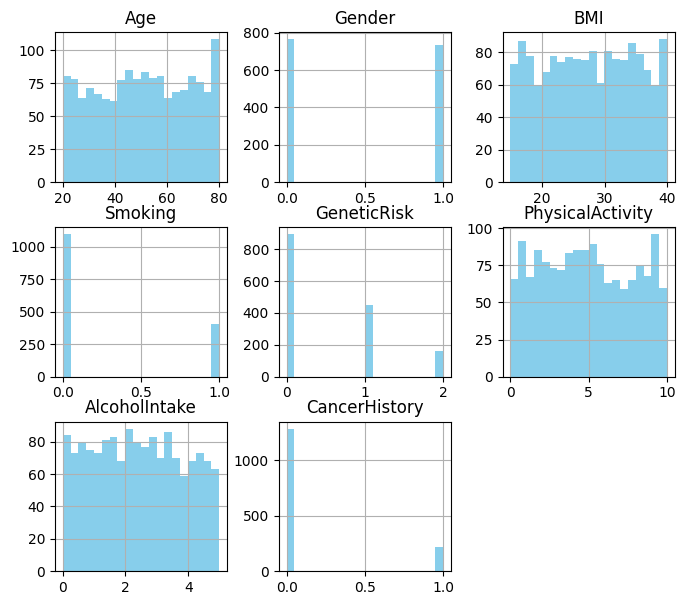

In [10]:
#extract numcolumns
num_cols = df.select_dtypes(include=['int64','float64']).columns.drop('Diagnosis')
plot_histograms(num_cols,df)


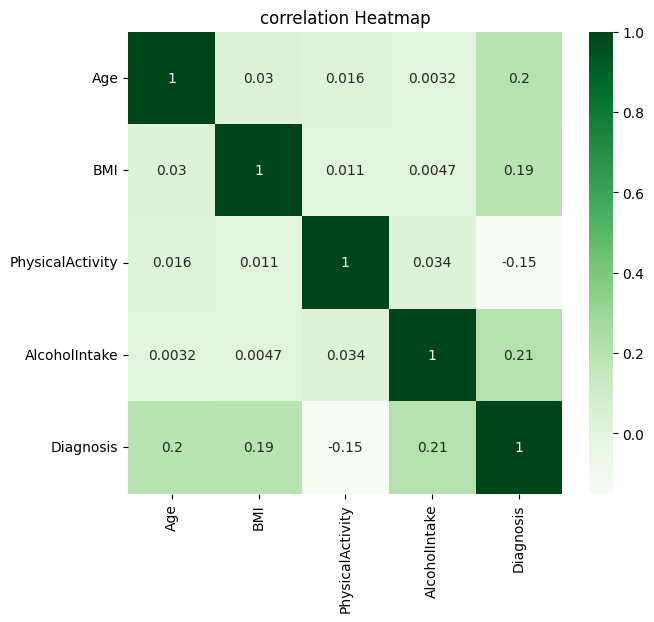

In [11]:
num_features = ["Age","BMI","PhysicalActivity","AlcoholIntake"]
plot_correlation(df,num_features,'Diagnosis')

### Now we have to perform the Preprocessing 

In [12]:
#splitting the data
X = df.drop('Diagnosis',axis=1)
y = df['Diagnosis']

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42,stratify=y)

In [14]:
#feature Scalling
sc = StandardScaler()
X_train_transformed = sc.fit_transform(X_train)
X_test_transformed = sc.fit_transform(X_test)

### Now initiate model building and Evaluation

In [15]:
#now we have to Register here the Mlflow Signature of our model 
from mlflow.models import infer_signature
signature = infer_signature(X_train_transformed,y_train)

In [19]:
## Logistic Regresion

from urllib.parse import urlparse


param_lr = {'random_state':42,'max_iter':1000}


with mlflow.start_run():
    LGR32 = LogisticRegression(**param_lr)

    LGR32.fit(X_train_transformed,y_train)

    y_pred_lgr = LGR32.predict(X_test_transformed)
    Accuracy_lgr = accuracy_score(y_test, y_pred_lgr)

    Precision_lgr = precision_score(y_test, y_pred_lgr)
    Recall_lgr = recall_score(y_test, y_pred_lgr)

    #Now i have to log the details

    mlflow.log_param("random State",param_lr['random_state'])
    mlflow.log_param("Max Iteration",param_lr['max_iter'])

    mlflow.log_metric("Accuracy",Accuracy_lgr)
    mlflow.log_metric("Precision",Precision_lgr)
    mlflow.log_metric("Recall",Recall_lgr)


    #setup the tracking Server
    mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")
    tracking_url_type_store=urlparse(mlflow.get_tracking_uri()).scheme


    if tracking_url_type_store != 'file':
        mlflow.sklearn.log_model(LGR32,"model",registered_model_name="LGR32")
    else:
        mlflow.sklearn.log_model(LGR32,"model",signature=signature)





2025/10/06 22:45:30 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/06 22:45:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'LGR32'.
2025/10/06 22:45:39 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: LGR32, version 1


🏃 View run stately-fox-188 at: http://127.0.0.1:5000/#/experiments/0/runs/021a51504bd7478eb554b155b45e349e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0


Created version '1' of model 'LGR32'.
